In [131]:
import numpy as np, numpy.polynomial as npp, numpy.linalg as npa
import matplotlib.pyplot as plt

In [125]:
from dataclasses import dataclass

@dataclass
class Coefficient:
    order: int
    value: float

test_coefs = [Coefficient(0, -2), Coefficient(1, 1)]#, Coefficient(2, 1)]
first_point = (4, 4)
second_point = (3, 3)

In [126]:
def parse_coefficient_list(coef_list: list[Coefficient]) -> npp.Polynomial:
    result = np.zeros(max([coef.order for coef in coef_list]) + 1)
    for coef in coef_list:
        result[coef.order] = coef.value
    return npp.Polynomial(result).trim()

print(_test_poly := parse_coefficient_list(test_coefs))

-2.0 + 1.0·x


In [127]:
def stirling_matrix(order: int) -> np.ndarray:
    matrix = np.zeros((order + 1, order + 1)) + np.identity(order + 1)
    for m in range(2, order + 1):
        for k in range(1, m):
            matrix[m, k] = matrix[m - 1, k - 1] - (m - 1) * matrix[m - 1, k]
    return matrix

def equation_to_parametric_poly(poly: npp.Polynomial) -> npp.Polynomial:
    return npp.Polynomial(
        np.dot(poly.coef, stirling_matrix(poly.degree()))
        )

print(stirling_matrix(_test_poly.degree()))
print(_test_param_poly := equation_to_parametric_poly(_test_poly))

[[1. 0.]
 [0. 1.]]
-2.0 + 1.0·x


In [128]:
def solve_parametric(poly: npp.Polynomial) -> np.ndarray:
    return poly.roots()

print(_parametric_solution := solve_parametric(_test_param_poly))
print(_sol_powers := _parametric_solution[_parametric_solution > _test_param_poly.degree()])

[2.]
[2.]


[0.25       0.33333333]


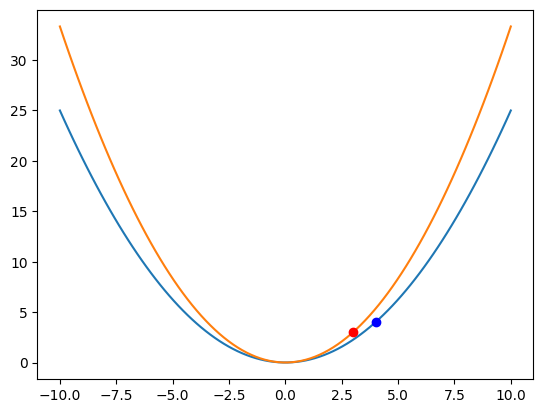

In [141]:
assert(_sol_powers.shape == (1,))
power = _sol_powers[0]
b = np.asarray([first_point[1], second_point[1]])
A = np.asarray([first_point[0], second_point[0]]) ** power
c_coefs = b / A
print(c_coefs)

xs = np.linspace(-10, 10, 100)
plt.plot(xs, c_coefs[0] * xs ** power)
plt.plot(xs, c_coefs[1] * xs ** power)
plt.plot(*first_point, 'bo')
plt.plot(*second_point, 'ro')

In [144]:
def solve(test_coefs: list[Coefficient], first_point: tuple[float, float], second_point: tuple[float, float]):
    equation_poly = parse_coefficient_list(test_coefs)
    param_poly = equation_to_parametric_poly(equation_poly)
    param_roots = solve_parametric(param_poly)
    roots_more_than_order = param_roots[param_roots > param_poly.degree()]
    return roots_more_than_order

test_coefs = [Coefficient(0, 12), Coefficient(1, -6), Coefficient(2, 1)]
first_point = (4, 4)
second_point = (3, 3)

solve(test_coefs, first_point, second_point)

array([3., 4.])